In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import datetime
pd.set_option('display.max_rows', 500) # показывать больше строк
## загрузка dataset
fl= pd.read_csv('flights.csv')

Посмотрим на данные

In [366]:
fl. info()
#fl

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flight_id        126 non-null    int64  
 1   flight_no        126 non-null    object 
 2   dep_city         126 non-null    object 
 3   arr_city         126 non-null    object 
 4   model            126 non-null    object 
 5   buisness_class   126 non-null    int64  
 6   economy_class    126 non-null    int64  
 7   total_seats      126 non-null    int64  
 8   duration         126 non-null    float64
 9   duration_actual  126 non-null    float64
 10  flihgt_amount    118 non-null    float64
 11  udel_amount      118 non-null    float64
 12  count            126 non-null    int64  
 13  zapoln           126 non-null    float64
 14  sheduled_hour    126 non-null    float64
 15  sheduled_min     126 non-null    float64
 16  dow              126 non-null    float64
 17  rashod_topliva  

Всего за 4 зимних месяца (с декабря 2016 по декабрь 2017) есть информация о 125 рейсах.
1. Есть часть рейсов из Анапы в Новокузнецк, по которым данные отсутствуют. Соотвтетсвенно, для анализа не годятся, исключаем их из выборки.


In [367]:
fl1=fl.dropna(inplace=False)
display(fl1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 125
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flight_id        118 non-null    int64  
 1   flight_no        118 non-null    object 
 2   dep_city         118 non-null    object 
 3   arr_city         118 non-null    object 
 4   model            118 non-null    object 
 5   buisness_class   118 non-null    int64  
 6   economy_class    118 non-null    int64  
 7   total_seats      118 non-null    int64  
 8   duration         118 non-null    float64
 9   duration_actual  118 non-null    float64
 10  flihgt_amount    118 non-null    float64
 11  udel_amount      118 non-null    float64
 12  count            118 non-null    int64  
 13  zapoln           118 non-null    float64
 14  sheduled_hour    118 non-null    float64
 15  sheduled_min     118 non-null    float64
 16  dow              118 non-null    float64
 17  rashod_topliva  

None

Получили чистые данные для анализа. 
Расшифрофка полей:
    flight_id        идентификатор (уникальный номер) рейса
 1   flight_no       номер рейса
 2   dep_city        город вылета
 3   arr_city        город прилета
 5   buisness_class  Количество мест бизнесс-класса в самолете
 6   economy_class   Количество мест экономического класса в самолете
 7   total_seats     Всего мест
 8   duration        Продолжительность перелета по расписанию
 9   duration_actual фактическая продолжительность перелета
 10  flihgt_amount   Стоимость проданных билетов на рейс
 11  udel_amount     стомость билетов/количество посадочных мест
 12  count           Количество проданных билетов
 13  zapoln          заполненность самолета (количество билетов/количество мест)
 14  sheduled_hour   час отправления по расписанию
 15  sheduled_min    минута отправления по расписанию
 16  dow             день недели по расписанию
 17  rashod_topliva  расход топлива на рейс в 1000 кг
 18  fuel_price      стоимость 1000 кг топлива.

2. Подготовим данный для анализа. 
   рассчитаем 
    - стоимость топлива на рейс, 
    - "грязную прибыль"  - стоимость билетов-стоимость топлива,
    - долю стоимости топлива в выручке от продажи билетов
    - долю "грязной выручки" в стоимости билетов
    
    По последнему показателю сразу определим убыточные рейсы и сгруппируем их по времени вылета и дням недели.
        

In [370]:
fl1['fuel_sum']=fl1.rashod_topliva*fl1.fuel_price
fl1['marja']=fl1.flihgt_amount-fl1.fuel_sum
fl1['dolya_fuel']=fl1.fuel_sum/fl1.flihgt_amount *100
fl1['zapoln']=fl1.zapoln*100
fl1['dolya_marj']=fl1.marja/fl1.flihgt_amount
##удаляем лишние столбцы
fl1=fl1.drop(['buisness_class', 'economy_class', 'sheduled_hour','sheduled_min', 'rashod_topliva', 'rashod_topliva'], axis=1)

<ipython-input-370-4a54877db4f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl1['fuel_sum']=fl1.rashod_topliva*fl1.fuel_price
<ipython-input-370-4a54877db4f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl1['marja']=fl1.flihgt_amount-fl1.fuel_sum
<ipython-input-370-4a54877db4f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Фильтруем по заполняемости рейса (>75%)

In [371]:

fl1[fl1.zapoln<75]


,flight_id,flight_no,dep_city,arr_city,model,total_seats,duration,duration_actual,flihgt_amount,udel_amount,count,zapoln,dow,fuel_price,fuel_sum,marja,dolya_fuel,dolya_marj
18,136253.0,PG0252,Anapa,Moscow,Boeing 737-300,130.0,100.0,98.0,1407800.0,10829.230769,93.0,71.538462,6.0,38867.0,155468.000,1252332.000,11.043330,0.889567
38,136352.0,PG0252,Anapa,Moscow,Boeing 737-300,130.0,100.0,100.0,1372400.0,10556.923077,92.0,70.769231,6.0,38867.0,155468.000,1216932.000,11.328184,0.886718
39,136360.0,PG0252,Anapa,Moscow,Boeing 737-300,130.0,100.0,100.0,1455400.0,11195.384615,97.0,74.615385,0.0,39553.0,158212.000,1297188.000,10.870688,0.891293
47,136418.0,PG0252,Anapa,Moscow,Boeing 737-300,130.0,100.0,100.0,1407800.0,10829.230769,97.0,74.615385,3.0,38867.0,155468.000,1252332.000,11.043330,0.889567
100,136807.0,PG0480,Anapa,Belgorod,Sukhoi Superjet-100,97.0,50.0,50.0,531000.0,5474.226804,68.0,70.103093,4.0,39553.0,55967.495,475032.505,10.540018,0.894600


По фильтру Заполняемость рейса менее 75% найдено всего 4 рейса. В целом принимать решение о рентабельности рейсаа по данному показателю не можем.
Отсортируем по доле маржинальности, посмотрим на описательную статистику. Болше всего интересует столбец dolya_marj
Видим, что 25% значений лежат за границей 90% маржинальности.
Поскольку стоит задача выделить наименее прибыльные рейсы по каждому из направлений (а у нас их 2) разделим наш массив данных на 2 части: рейсы в москву и рейсы в белгород
посмотрим на 25% наименее прибыльных рейсов, сформируем их в отдельный dataframe

In [372]:
fl1_moskow=fl1[fl1.arr_city=='Moscow']

fl1_moskow . describe()
#fl1_moskow[fl1_moskow.dolya_marj<=0.899]


,flight_id,total_seats,duration,duration_actual,flihgt_amount,udel_amount,count,zapoln,dow,fuel_price,fuel_sum,marja,dolya_fuel,dolya_marj
count,59.000000,59.0,59.0,59.000000,5.900000e+01,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,5.900000e+01,59.000000,59.000000
mean,136309.491525,130.0,100.0,100.101695,1.643156e+06,12639.661017,113.203390,87.079531,3.101695,39192.559322,156770.237288,1.486386e+06,9.612003,0.903880
std,107.572489,0.0,0.0,0.922794,1.426974e+05,1097.671965,9.952958,7.656121,2.023099,345.496757,1381.987029,1.428270e+05,0.839508,0.008395
min,136120.000000,130.0,100.0,98.000000,1.372400e+06,10556.923077,92.000000,70.769231,0.000000,38867.000000,155468.000000,1.216932e+06,8.243266,0.886718
25%,136246.500000,130.0,100.0,100.000000,1.554200e+06,11955.384615,107.000000,82.307692,1.000000,38867.000000,155468.000000,1.397788e+06,9.092105,0.899035
50%,136306.000000,130.0,100.0,100.000000,1.628600e+06,12527.692308,111.000000,85.384615,3.000000,38867.000000,155468.000000,1.470388e+06,9.698565,0.903014
75%,136394.000000,130.0,100.0,101.000000,1.726200e+06,13278.461538,119.000000,91.538462,5.000000,39553.000000,158212.000000,1.568160e+06,10.096492,0.909079
max,136492.000000,130.0,100.0,102.000000,1.886000e+06,14507.692308,130.000000,100.000000,6.000000,39553.000000,158212.000000,1.730532e+06,11.328184,0.917567


То есть 25% рейсов в москву ниже маржинальности в 89.9%
Посмотрим, что с Белгродом

In [373]:
fl1_belg=fl1[fl1.arr_city=='Belgorod']
fl1_belg.describe()

,flight_id,total_seats,duration,duration_actual,flihgt_amount,udel_amount,count,zapoln,dow,fuel_price,fuel_sum,marja,dolya_fuel,dolya_marj
count,59.000000,59.0,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,136786.169492,97.0,50.0,49.966102,712688.135593,7347.300367,90.542373,93.342652,3.101695,39192.559322,55457.471441,657230.664153,7.834870,0.921651
std,106.680017,0.0,0.0,0.614932,56149.984140,578.865816,6.874044,7.086644,2.023099,345.496757,488.877912,56183.895489,0.699664,0.006997
min,136592.000000,97.0,50.0,49.000000,531000.000000,5474.226804,68.000000,70.103093,0.000000,38867.000000,54996.805000,475032.505000,7.186307,0.894600
25%,136694.500000,97.0,50.0,50.000000,683100.000000,7042.268041,87.000000,89.690722,1.000000,38867.000000,54996.805000,627617.850000,7.313145,0.918779
50%,136800.000000,97.0,50.0,50.000000,733800.000000,7564.948454,92.000000,94.845361,3.000000,38867.000000,54996.805000,678803.195000,7.498325,0.925017
75%,136869.000000,97.0,50.0,50.000000,765300.000000,7889.690722,97.000000,100.000000,5.000000,39553.000000,55967.495000,709332.505000,8.122115,0.926869
max,136961.000000,97.0,50.0,51.000000,765300.000000,7889.690722,97.000000,100.000000,6.000000,39553.000000,55967.495000,710303.195000,10.540018,0.928137


По Белгороду в целом показатель чуть выше - 91.9%

In [374]:
#pd.concat([october_df, november_df, december_df], axis=0)
fl_looser=pd.concat([fl1_moskow[fl1_moskow.dolya_marj<0.899],fl1_belg[fl1_belg.dolya_marj<0.919]],axis=0)
fl_looser
#fl_moskow[fl_moskow.dolya_marj<0.899]

,flight_id,flight_no,dep_city,arr_city,model,total_seats,duration,duration_actual,flihgt_amount,udel_amount,count,zapoln,dow,fuel_price,fuel_sum,marja,dolya_fuel,dolya_marj
1,136130.0,PG0252,Anapa,Moscow,Boeing 737-300,130.0,100.0,99.0,1556600.0,11973.846154,107.0,82.307692,1.0,39553.0,158212.000,1398388.000,10.163947,0.898361
9,136204.0,PG0252,Anapa,Moscow,Boeing 737-300,130.0,100.0,100.0,1457800.0,11213.846154,107.0,82.307692,4.0,39553.0,158212.000,1299588.000,10.852792,0.891472
16,136250.0,PG0252,Anapa,Moscow,Boeing 737-300,130.0,100.0,101.0,1407800.0,10829.230769,99.0,76.153846,3.0,39553.0,158212.000,1249588.000,11.238244,0.887618
17,136252.0,PG0252,Anapa,Moscow,Boeing 737-300,130.0,100.0,101.0,1517600.0,11673.846154,102.0,78.461538,2.0,38867.0,155468.000,1362132.000,10.244333,0.897557
18,136253.0,PG0252,Anapa,Moscow,Boeing 737-300,130.0,100.0,98.0,1407800.0,10829.230769,93.0,71.538462,6.0,38867.0,155468.000,1252332.000,11.043330,0.889567
22,136266.0,PG0252,Anapa,Moscow,Boeing 737-300,130.0,100.0,100.0,1566400.0,12049.230769,108.0,83.076923,1.0,39553.0,158212.000,1408188.000,10.100358,0.898996
29,136306.0,PG0252,Anapa,Moscow,Boeing 737-300,130.0,100.0,100.0,1443200.0,11101.538462,102.0,78.461538,0.0,38867.0,155468.000,1287732.000,10.772450,0.892275
31,136320.0,PG0252,Anapa,Moscow,Boeing 737-300,130.0,100.0,100.0,1544400.0,11880.000000,106.0,81.538462,0.0,39553.0,158212.000,1386188.000,10.244237,0.897558
37,136351.0,PG0252,Anapa,Moscow,Boeing 737-300,130.0,100.0,100.0,1555400.0,11964.615385,105.0,80.769231,0.0,39553.0,158212.000,1397188.000,10.171789,0.898282
38,136352.0,PG0252,Anapa,Moscow,Boeing 737-300,130.0,100.0,100.0,1372400.0,10556.923077,92.0,70.769231,6.0,38867.0,155468.000,1216932.000,11.328184,0.886718


Сгруппируем наименее прибыльные рейсы их по номеру рейса и по дню недели

In [375]:
agg=fl_looser.groupby(['flight_no','dow'])['flight_id'].count().reset_index().sort_values(['flight_no', 'flight_id'], ascending=False)


Присваиваем дни недели для удобства идентификации (SQL преобразовал 0 - воскресенье, 6 - суббота)

In [376]:
days = [
'Воскресенье',
'Понедельник',
'Вторник',
'Среда',
'Четверг',
'Пятница',
'Суббота'

]
agg['day']=agg.dow.copy()
agg['day']=agg['day'].apply(lambda x: str(x))
agg['dow']=agg['dow'].apply(lambda x: int(x))


for i, string in enumerate (agg.day):
    agg.at[i,'day']=days[agg.at[i,'dow']]
    


Построим график по дням недели и по количеству наименее рентабельных рейсов по обоим направлениям

In [377]:
agg=agg.set_index('dow','flight_no' )##,'flight_no'
agg.columns=['flight_no', 'count', 'day']

In [378]:
agg=agg.sort_values('dow')
agg

,flight_no,count,day
dow,,,
0,PG0480,4,Воскресенье
0,PG0252,5,Воскресенье
1,PG0480,2,Понедельник
1,PG0252,2,Понедельник
2,PG0480,2,Вторник
2,PG0252,1,Вторник
3,PG0252,2,Среда
4,PG0480,2,Четверг
4,PG0252,3,Четверг


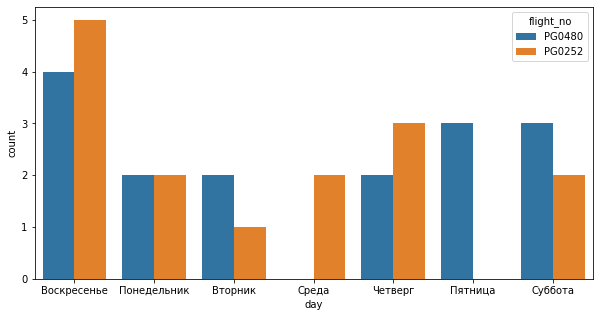

In [379]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='day', y='count', hue='flight_no', data=agg, ax=ax)


Заполняемость рейсов.

1 квартиль для Московских рейсов - 82.31
1 квартиль для Белгородских рейсов - 89.69

Выбираем также наименее заполненные рейсы по обоим направлениям и собираем их в 1 таблицу
Получаем 29 рейсов, заполненных менее других, группируем также по дням недели 


In [387]:
fl_empty=pd.concat([fl1_moskow[fl1_moskow.zapoln<82.31],fl1_belg[fl1_belg.zapoln<89.69]],axis=0)
#                 fl_looser=pd.concat([fl1_moskow[fl1_moskow.dolya_marj<0.899],fl1_belg[fl1_belg.dolya_marj<0.919]],axis=0)   
fl_empty.info()
agg_empty=fl_empty.groupby(['flight_no', 'arr_city', 'dow'])['flight_id'].count().reset_index().sort_values(['flight_no', 'flight_id'], ascending=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 1 to 120
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flight_id        29 non-null     float64
 1   flight_no        29 non-null     object 
 2   dep_city         29 non-null     object 
 3   arr_city         29 non-null     object 
 4   model            29 non-null     object 
 5   total_seats      29 non-null     float64
 6   duration         29 non-null     float64
 7   duration_actual  29 non-null     float64
 8   flihgt_amount    29 non-null     float64
 9   udel_amount      29 non-null     float64
 10  count            29 non-null     float64
 11  zapoln           29 non-null     float64
 12  dow              29 non-null     float64
 13  fuel_price       29 non-null     float64
 14  fuel_sum         29 non-null     float64
 15  marja            29 non-null     float64
 16  dolya_fuel       29 non-null     float64
 17  dolya_marj       

In [388]:
agg_empty['day']=agg_empty.dow.copy()
agg_empty['day']=agg_empty['day'].apply(lambda x: str(x))
agg_empty['dow']=agg_empty['dow'].apply(lambda x: int(x))

## Добавляем текстовые значения дней недели
for i, string in enumerate (agg_empty.day):
    agg_empty.at[i,'day']=days[agg_empty.at[i,'dow']]
agg_empty    

,flight_no,arr_city,dow,flight_id,day
9,PG0480,Belgorod,5,3,Пятница
10,PG0480,Belgorod,6,3,Суббота
6,PG0480,Belgorod,0,2,Воскресенье
7,PG0480,Belgorod,2,2,Вторник
8,PG0480,Belgorod,4,1,Четверг
0,PG0252,Moscow,0,5,Воскресенье
5,PG0252,Moscow,6,4,Суббота
3,PG0252,Moscow,3,3,Среда
4,PG0252,Moscow,4,3,Четверг
2,PG0252,Moscow,2,2,Вторник


In [389]:
agg_empty=agg_empty.set_index('dow','flight_no' )##,'flight_no'
agg_empty.columns=['flight_no','city' ,'count', 'day']
agg_empty=agg_empty.sort_values('dow')
agg_empty

,flight_no,city,count,day
dow,,,,
0,PG0480,Belgorod,2,Воскресенье
0,PG0252,Moscow,5,Воскресенье
1,PG0252,Moscow,1,Понедельник
2,PG0480,Belgorod,2,Вторник
2,PG0252,Moscow,2,Вторник
3,PG0252,Moscow,3,Среда
4,PG0480,Belgorod,1,Четверг
4,PG0252,Moscow,3,Четверг
5,PG0480,Belgorod,3,Пятница


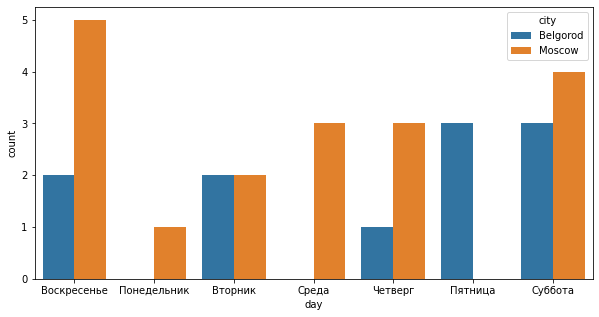

In [390]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='day', y='count', hue='city', data=agg_empty, ax=ax)


## Вывод
По имеющимся данным можно сделать вывод, что наименее заполненные и наименее прибыльные рейсы осуществляются по субботам и воскресеньям в Москву, по пятницам и субботам в Белгород.